In [1]:
from functions import objectives
from functions import constraints
import tensorflow as tf
import matplotlib.pyplot as plt

plt.style.use('plot_style.txt')

2023-05-09 16:29:41.139493: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
constraints.toy_constraint_one(tf.Variable([[0.21524239, 0.39496943]], dtype=tf.float64))

<tf.Tensor: shape=(1, 1), dtype=float64, numpy=array([[-0.00477825]])>

In [10]:
constraints.parr_constraint(tf.Variable([[0.94757762, 0.46843272]], dtype=tf.float64))

<tf.Tensor: shape=(1, 1), dtype=float64, numpy=array([[-0.00075414]])>

In [11]:
x_list = tf.linspace(0, 1, 1000)
y_list = tf.linspace(0, 1, 1000)
xs, ys = tf.meshgrid(x_list, y_list)
coordinates = tf.stack((tf.reshape(xs, [-1]), tf.reshape(ys, [-1])), axis=1)

In [3]:
objectives.goldstein_price(tf.Variable([[0.94769, 0.46856]], dtype=tf.float64))

<tf.Tensor: shape=(1, 1), dtype=float64, numpy=array([[-0.5273951]])>

In [4]:
constraints.centered_branin(tf.Variable([[0.94769, 0.46856]], dtype=tf.float64))

<tf.Tensor: shape=(1, 1), dtype=float64, numpy=array([[-6.37877422e-05]])>

In [5]:
constraints.parr_constraint(tf.Variable([[0.94769, 0.46856]], dtype=tf.float64))

<tf.Tensor: shape=(1, 1), dtype=float64, numpy=array([[-5.61680662e-05]])>

In [6]:
constraints.centered_branin(tf.Variable([[0.35262327, 0.45821539]], dtype=tf.float64))

<tf.Tensor: shape=(1, 1), dtype=float64, numpy=array([[0.04046348]])>

In [7]:
linear_objective = objectives.linear_objective(coordinates)
goldstein_price_objective = objectives.goldstein_price(coordinates)
constraint_one = constraints.toy_constraint_one(coordinates)
constraint_two = constraints.toy_constraint_two(coordinates)
centered_branin_constraint = constraints.centered_branin(coordinates)
parr_constraint = constraints.parr_constraint(coordinates)

### LSQ Problem

In [220]:
x_list = tf.linspace(0, 1, 1000)
y_list = tf.linspace(0, 1, 1000)
xs, ys = tf.meshgrid(x_list, y_list)
coordinates = tf.stack((tf.reshape(xs, [-1]), tf.reshape(ys, [-1])), axis=1)

objective = objectives.linear_objective(coordinates)
constraint_one = constraints.toy_constraint_one(coordinates)
constraint_one_valid = tf.where(constraint_one <= 0, 1, 0)
constraint_one_border = tf.where(tf.abs(constraint_one) <= 0.004, 1, 0)
constraint_two = constraints.toy_constraint_two(coordinates)
constraint_two_valid = tf.where(constraint_two <= 0, 1, 0)
constraint_two_border = tf.where(tf.abs(constraint_two) <= 0.004, 1, 0)

In [221]:
constraint_one_border_coords = tf.boolean_mask(coordinates, tf.squeeze(constraint_one_border), axis=0)
constraint_two_border_coords = tf.boolean_mask(coordinates, tf.squeeze(constraint_two_border), axis=0)

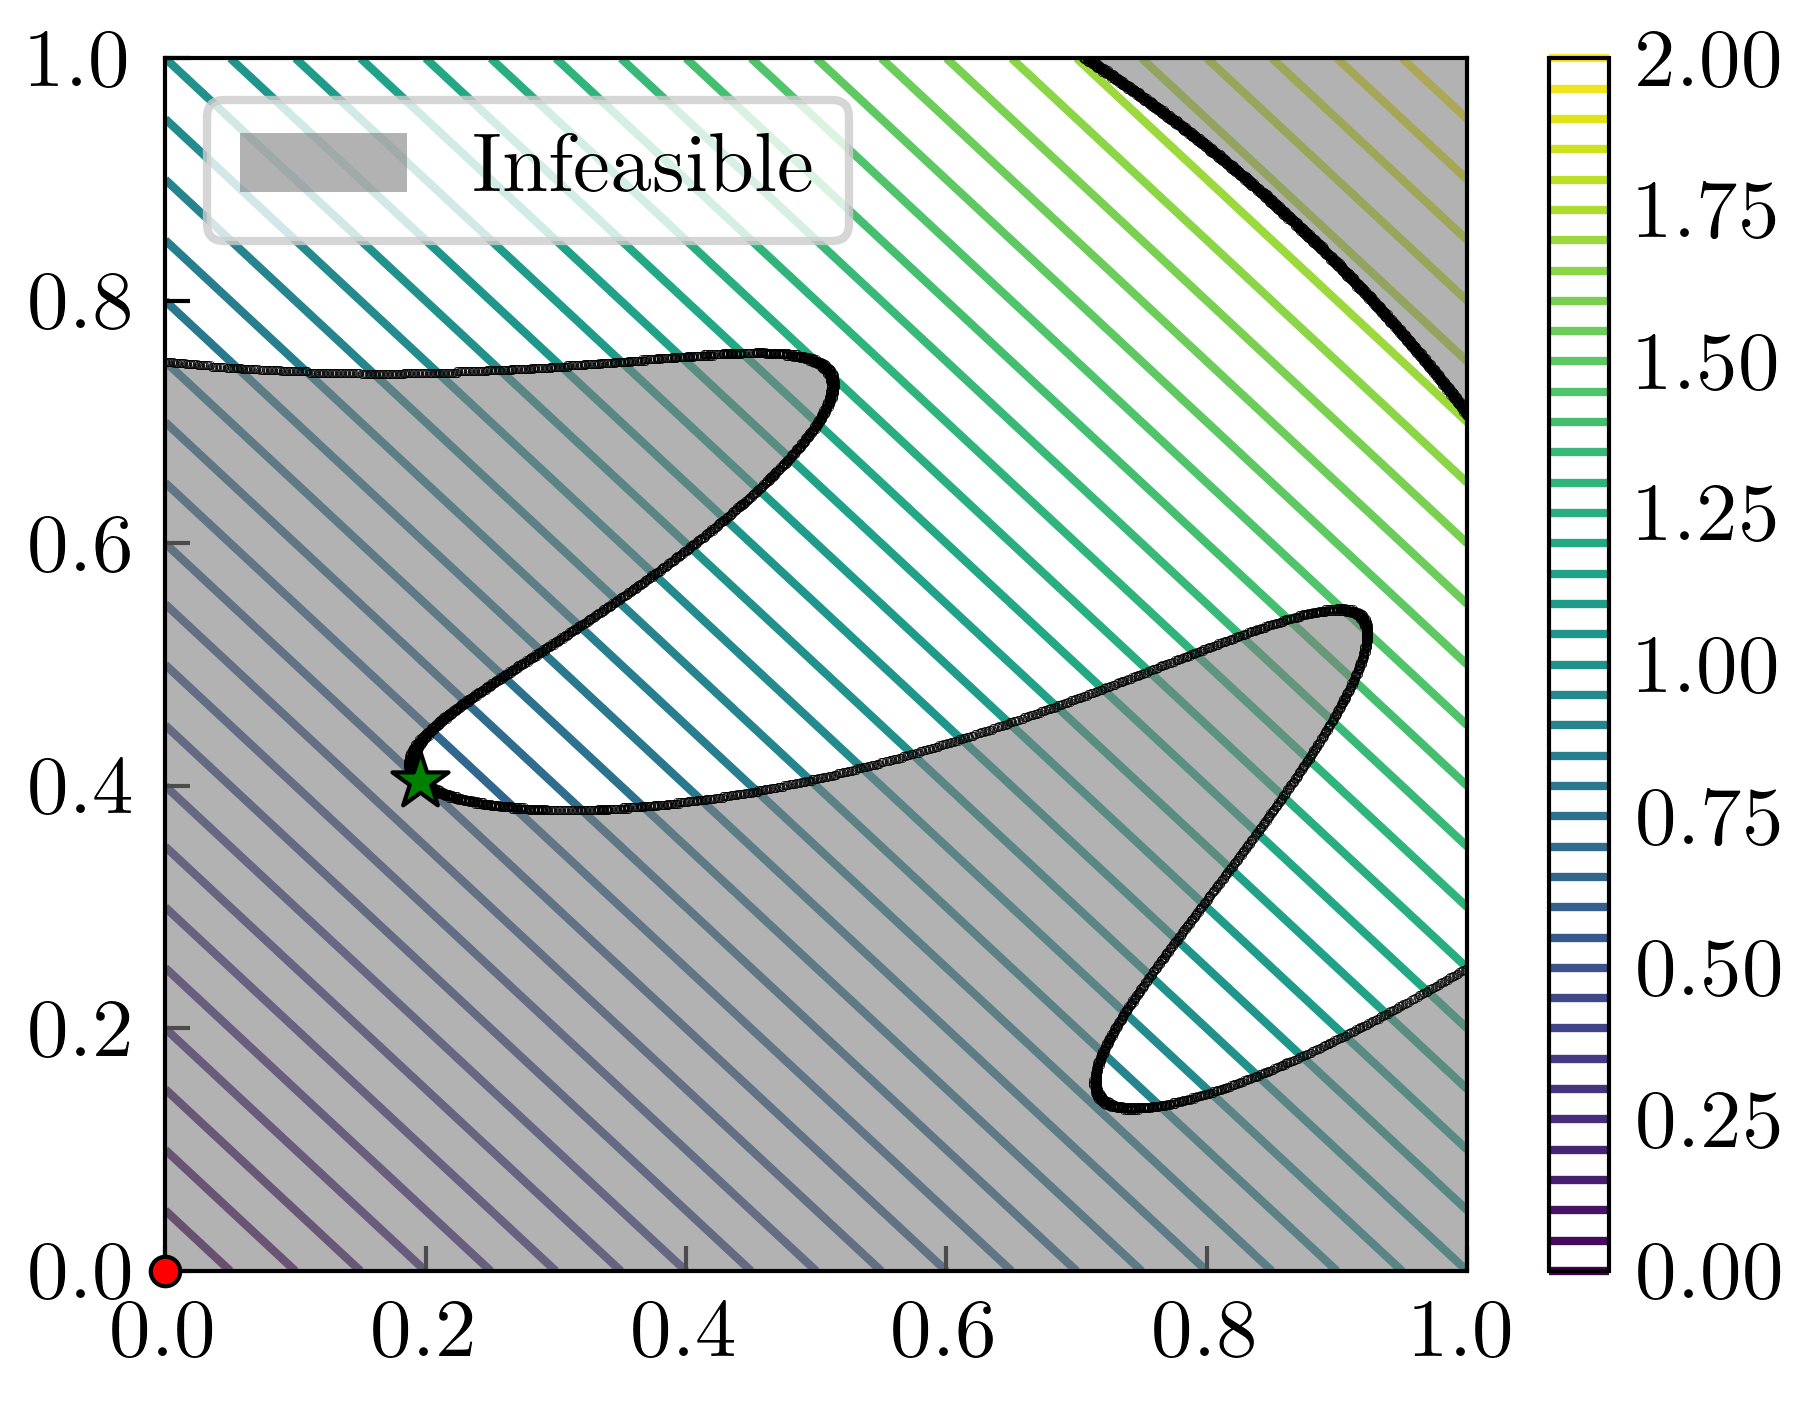

In [222]:
fig, ax = plt.subplots()
plt.margins()
contour_plot = ax.contour(xs, ys, tf.reshape(objective, [y_list.shape[0], x_list.shape[0]]), levels=40, zorder=1)
constraint_one_plot = ax.contourf(xs, ys, tf.reshape(constraint_one_valid, [y_list.shape[0], x_list.shape[0]]), levels=[0, 0.9], colors=['grey'], zorder=2, alpha=0.6)
# constraint_one_border_plot = ax.contourf(xs, ys, tf.reshape(constraint_one_border, [y_list.shape[0], x_list.shape[0]]), levels=[0.9, 1.1], colors=['black'], zorder=3)
ax.scatter(constraint_one_border_coords[:, 0], constraint_one_border_coords[:, 1], s=0.005, zorder=3, color='black')
constraint_two_plot = ax.contourf(xs, ys, tf.reshape(constraint_two_valid, [y_list.shape[0], x_list.shape[0]]), levels=[0, 0.9], colors=['grey'], zorder=2, alpha=0.6)
constraint_two_border_plot = ax.contourf(xs, ys, tf.reshape(constraint_two_border, [y_list.shape[0], x_list.shape[0]]), levels=[0.9, 1.1], colors=['black'], zorder=3)
ax.scatter(constraint_two_border_coords[:,  0], constraint_two_border_coords[:, 1], s=0.005, zorder=3, color='black')
ax.scatter(0.1954, 0.4044, zorder=3, marker="*", color="green", edgecolor="black", linewidth=0.5, s=50)
ax.scatter(0, 0, zorder=3, marker=".", color="red", s=50, edgecolor="black", linewidth=0.5, clip_on=False)
constraint_two_plot.collections[0].set_label("Infeasible")
legend = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0])
         for pc in constraint_two_plot.collections]
fig.colorbar(contour_plot)
# plt.xlim(-0.1, 1.0)
# plt.ylim(-0.1, 1.0)
# plt.axhline(0, color='black', linewidth=.5)
# plt.axvline(0, color='black', linewidth=.5)
plt.grid(False)
plt.legend(legend, ["Infeasible"], loc="upper left")
plt.savefig("figs/lsq_counterexample.png", bbox_inches="tight")
plt.show()

### Inequality Counterexample

In [263]:
def circle_constraint(x):
    x0 = x[..., :1]
    x1 = x[..., 1:]
    return (x0 - 1)**2 + (x1 - 1)**2 - 0.4

In [264]:
def line_constraint(x):
    return -x[..., :1] + 0.85

In [265]:
x_list = tf.linspace(0, 1, 1000)
y_list = tf.linspace(0, 1, 1000)
xs, ys = tf.meshgrid(x_list, y_list)
coordinates = tf.stack((tf.reshape(xs, [-1]), tf.reshape(ys, [-1])), axis=1)

objective = objectives.linear_objective(coordinates)
constraint_one = circle_constraint(coordinates)
constraint_one_valid = tf.where(constraint_one <= 0, 1, 0)
constraint_one_border = tf.where(tf.abs(constraint_one) <= 0.004, 1, 0)
constraint_one_border_coords = tf.boolean_mask(coordinates, tf.squeeze(constraint_one_border), axis=0)
constraint_two = line_constraint(coordinates)
constraint_two_valid = tf.where(constraint_two <= 0, 1, 0)
opt_y = 1 - tf.sqrt(0.4 - 0.15**2)

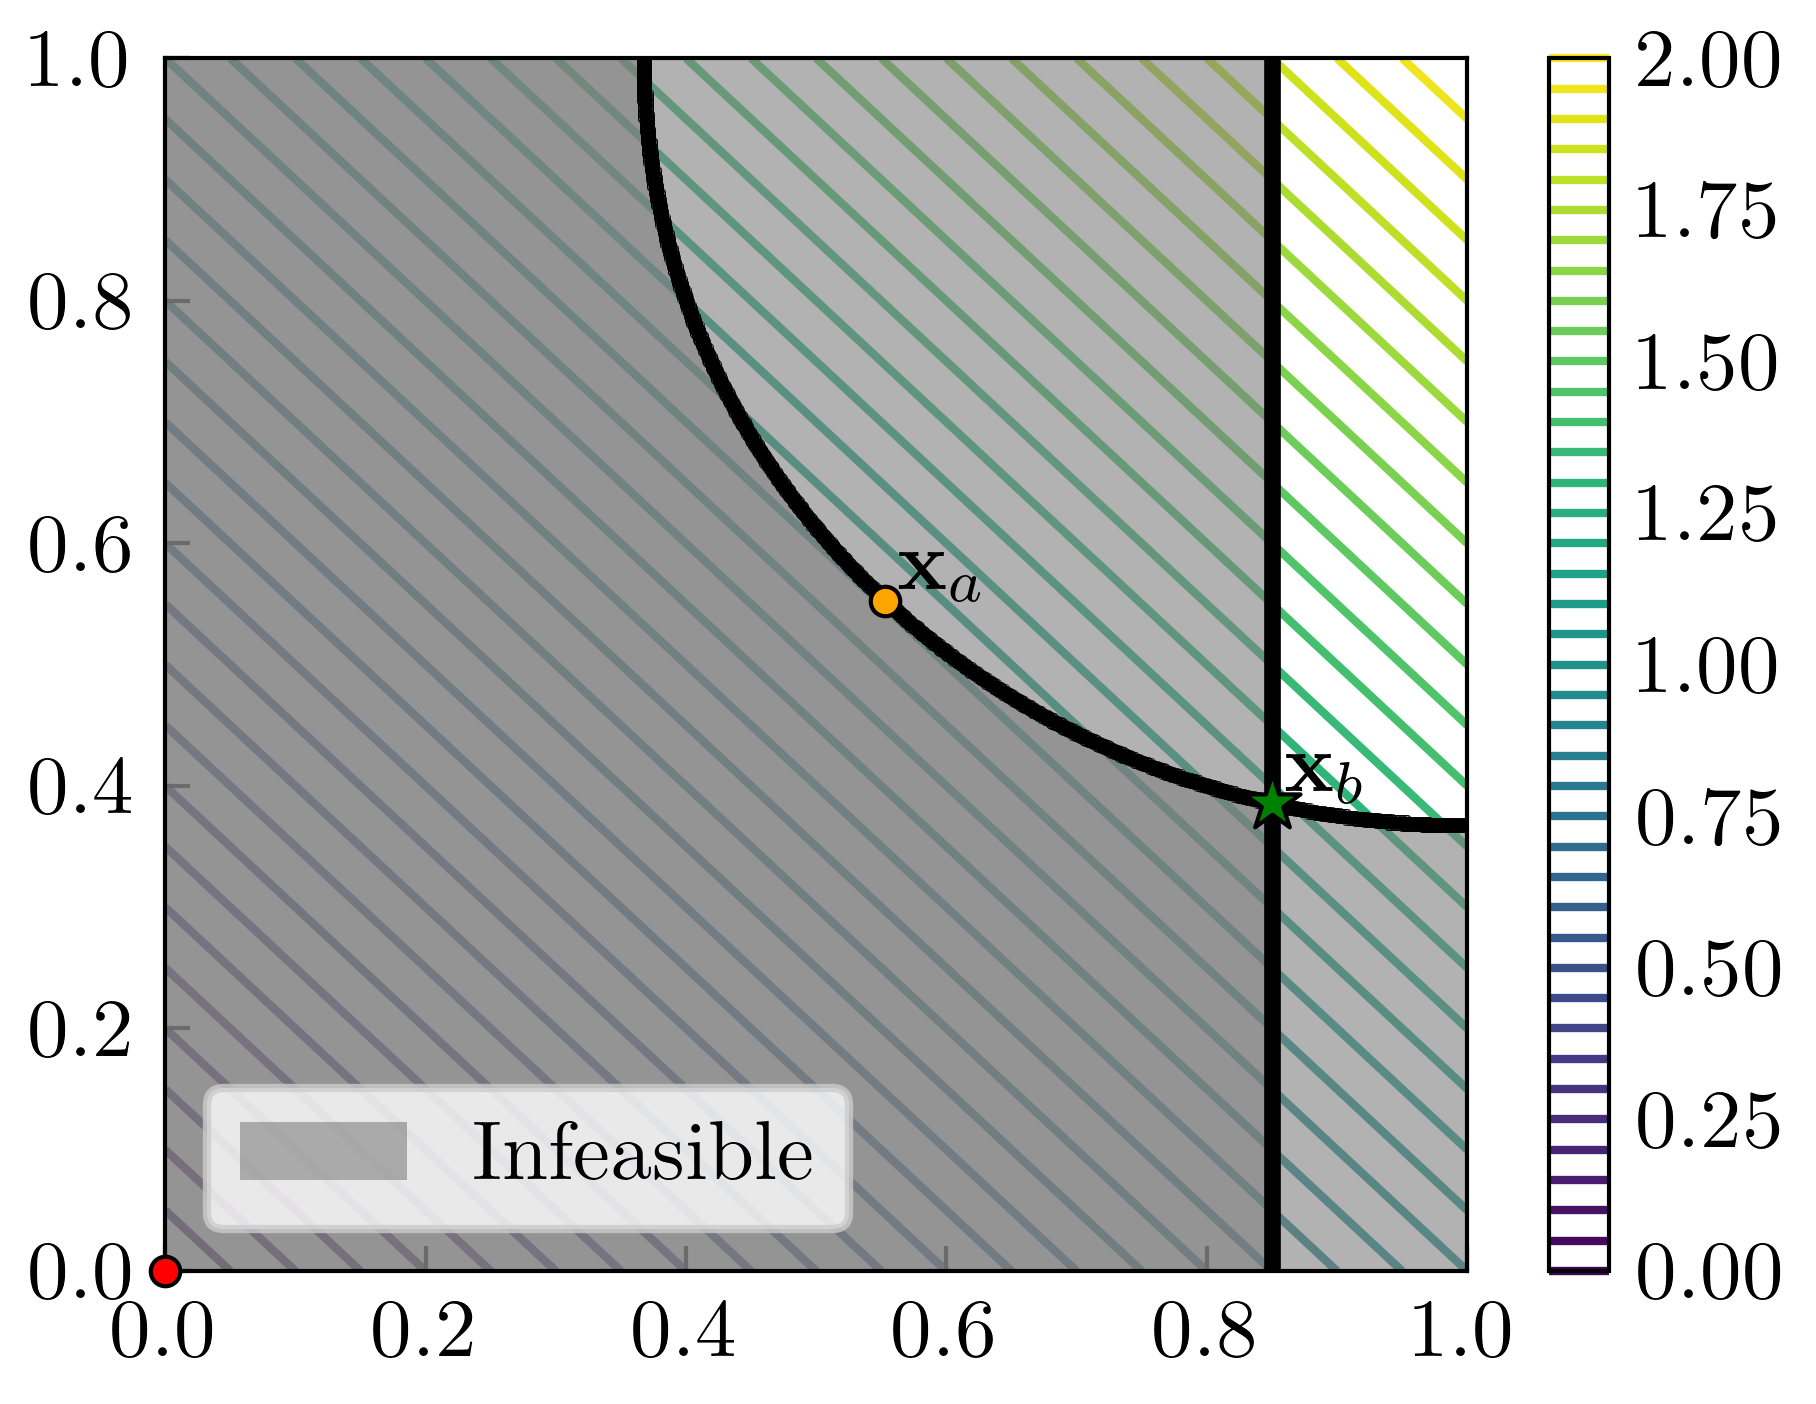

In [277]:
fig, ax = plt.subplots()
plt.margins()
contour_plot = ax.contour(xs, ys, tf.reshape(objective, [y_list.shape[0], x_list.shape[0]]), levels=40, zorder=1)
constraint_one_plot = ax.contourf(xs, ys, tf.reshape(constraint_one_valid, [y_list.shape[0], x_list.shape[0]]), levels=[0, 0.9], colors=['grey'], zorder=2, alpha=0.6)
constraint_two_plot = ax.contourf(xs, ys, tf.reshape(constraint_two_valid, [y_list.shape[0], x_list.shape[0]]), levels=[0, 0.9], colors=['grey'], zorder=2, alpha=0.6)
ax.scatter(constraint_one_border_coords[:, 0], constraint_one_border_coords[:, 1], s=0.005, zorder=3, color='black')
ax.scatter(1 - tf.sqrt(0.2), 1 - tf.sqrt(0.2), zorder=3, marker=".", color="orange", edgecolor="black", linewidth=0.5, s=50, clip_on=False)
ax.scatter(0, 0, zorder=3, marker=".", color="red", s=50, edgecolor="black", linewidth=0.5, clip_on=False)
ax.annotate("$\mathbf{x}_a$", (1 - tf.sqrt(0.2) + 0.01, 1 - tf.sqrt(0.2) + 0.01))
ax.scatter(0.85, opt_y, zorder=3, marker="*", color="green", edgecolor="black", linewidth=0.5, s=50, clip_on=False)
ax.annotate("$\mathbf{x}_b$", (0.86, opt_y + 0.01))
ax.axvline(x=0.85, color="black", linewidth=2)
constraint_two_plot.collections[0].set_label("Infeasible")
legend = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0])
         for pc in constraint_two_plot.collections]
fig.colorbar(contour_plot)
plt.grid(False)
plt.legend(legend, ["Infeasible"])
plt.savefig("figs/inequality_counterexample.png", bbox_inches="tight")
plt.show()

### GSBP

In [154]:
EPSILON = 0.01

In [178]:
x_list = tf.linspace(0, 1, 1000)
y_list = tf.linspace(0, 1, 1000)
xs, ys = tf.meshgrid(x_list, y_list)
coordinates = tf.stack((tf.reshape(xs, [-1]), tf.reshape(ys, [-1])), axis=1)

objective = objectives.goldstein_price(coordinates)
inequality_constraint = constraints.toy_constraint_one(coordinates)
inequality_constraint_valid = tf.where(inequality_constraint <= 0, 1, 0)
inequality_constraint_border = tf.where(tf.abs(inequality_constraint) <= 0.004, 1, 0)
equality_constraint_one = constraints.centered_branin(coordinates)
equality_constraint_one_valid = tf.where(tf.abs(equality_constraint_one) <= EPSILON, 1, 0)
equality_constraint_two = constraints.parr_constraint(coordinates)
equality_constraint_two_valid = tf.where(tf.abs(equality_constraint_two) <= EPSILON, 1, 0)

In [184]:
inequality_constraint_border_coords = tf.boolean_mask(coordinates, tf.squeeze(inequality_constraint_border), axis=0)
equality_constraint_one_valid_coords = tf.boolean_mask(coordinates, tf.squeeze(equality_constraint_one_valid), axis=0)
equality_constraint_two_valid_coords = tf.boolean_mask(coordinates, tf.squeeze(equality_constraint_two_valid), axis=0)

In [196]:
import pickle

In [198]:
run = 0
with open(f"../results/final_ts_results/gsbp/adam_no_prev_rbf_aggressive/data/run_{run}_data.pkl", "rb") as fp:
    data = pickle.load(fp)

print(data["OBJECTIVE"].query_points)

tf.Tensor(
[[0.484375   0.828125  ]
 [0.359375   0.453125  ]
 [0.859375   0.953125  ]
 [0.609375   0.203125  ]
 [0.109375   0.703125  ]
 [0.078125   0.234375  ]
 [0.578125   0.734375  ]
 [0.828125   0.484375  ]
 [0.328125   0.984375  ]
 [0.453125   0.359375  ]
 [0.76083655 0.44491994]
 [0.461788   0.45325075]
 [0.34798729 0.41289737]
 [0.32259927 0.48222645]
 [0.36668727 0.46013831]
 [0.95936913 0.06384634]
 [0.26876234 0.3869423 ]
 [0.89329704 0.52655031]
 [0.23548297 0.91958011]
 [0.21605004 0.94718927]
 [0.20971605 0.37558976]
 [0.25055383 0.82738722]
 [0.35281607 0.45027396]
 [0.35857663 0.45682546]
 [0.24437707 0.84681693]
 [0.35371504 0.44982529]
 [0.35515065 0.45835507]
 [0.24400503 0.83964501]
 [0.3550892  0.44987653]
 [0.98353825 0.54580237]
 [0.24754233 0.83879397]
 [0.35476772 0.45023067]
 [0.38550931 0.10109179]
 [0.89027439 0.42525629]
 [0.9495291  0.46701294]
 [0.94370969 0.47166107]
 [0.9467245  0.46906288]
 [0.94833542 0.46784086]
 [0.95076128 0.46696142]
 [0.81552509 0

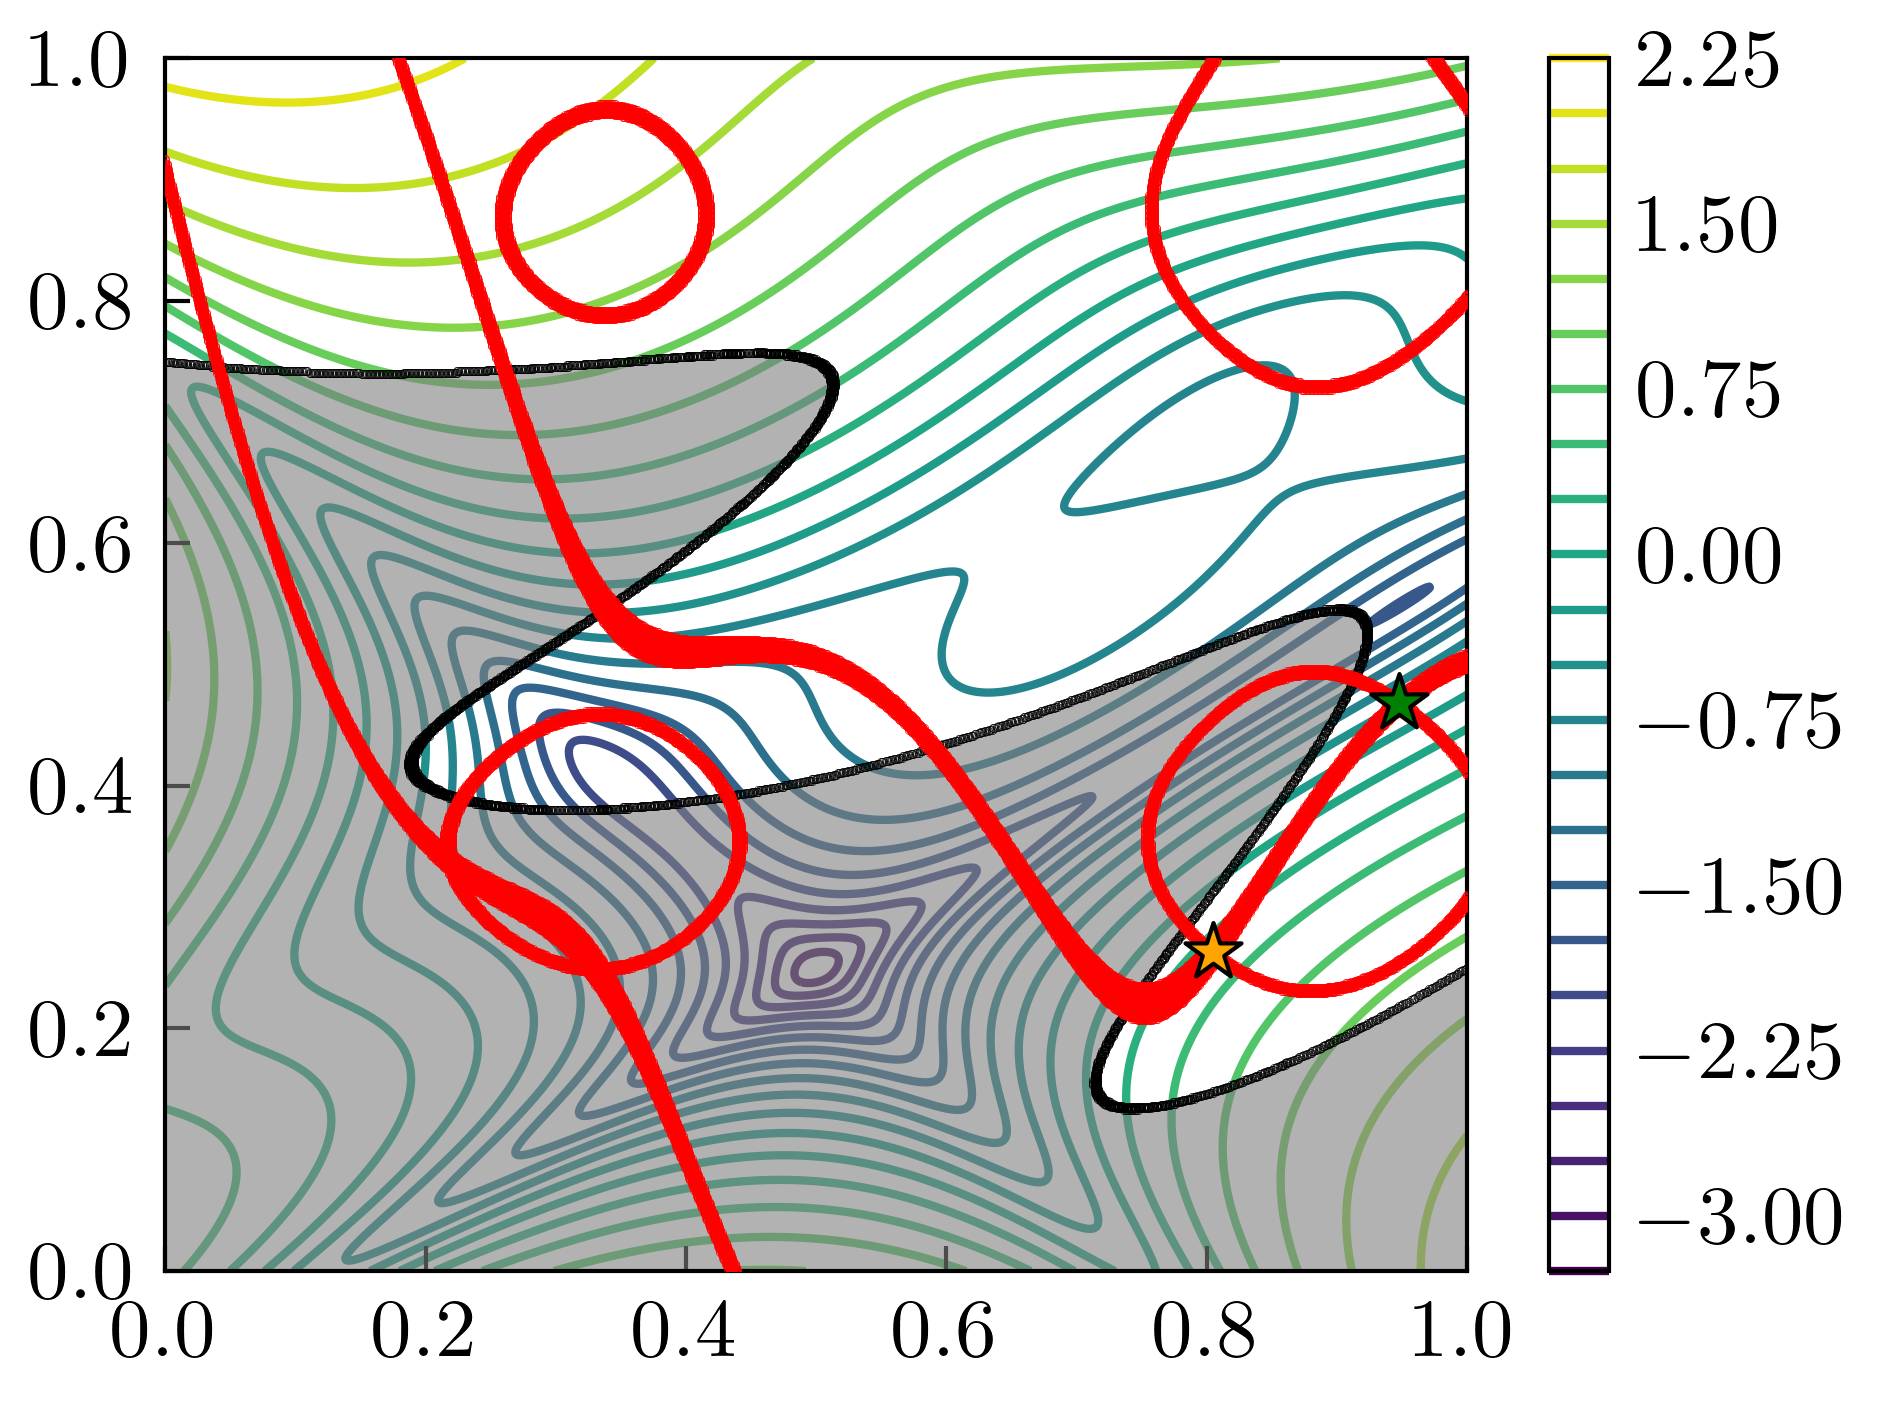

In [201]:
fig, ax = plt.subplots()
plt.margins()
contour_plot = ax.contour(xs, ys, tf.reshape(objective, [y_list.shape[0], x_list.shape[0]]), levels=20, zorder=1)
inequality_constraint_plot = ax.contourf(xs, ys, tf.reshape(inequality_constraint_valid, [y_list.shape[0], x_list.shape[0]]), levels=[0, 0.9], colors=['grey'], zorder=2, alpha=0.6)
# constraint_one_border_plot = ax.contourf(xs, ys, tf.reshape(constraint_one_border, [y_list.shape[0], x_list.shape[0]]), levels=[0.9, 1.1], colors=['black'], zorder=3)
ax.scatter(inequality_constraint_border_coords[:, 0], inequality_constraint_border_coords[:, 1], s=0.005, zorder=3, color='black')
ax.scatter(equality_constraint_one_valid_coords[:, 0], equality_constraint_one_valid_coords[:, 1], s=0.005, zorder=3, color='red')
ax.scatter(equality_constraint_two_valid_coords[:,  0], equality_constraint_two_valid_coords[:, 1], s=0.005, zorder=3, color='red')
ax.scatter(0.94769, 0.46856, zorder=3, marker="*", color="green", edgecolor="black", linewidth=0.5, s=50)
ax.scatter(0.80437858, 0.26275249, zorder=3, marker="*", color="orange", edgecolor="black", linewidth=0.5, s=50)
constraint_two_plot.collections[0].set_label("Infeasible")
legend = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0])
         for pc in constraint_two_plot.collections]
fig.colorbar(contour_plot)
# plt.xlim(-0.1, 1.0)
# plt.ylim(-0.1, 1.0)
# plt.axhline(0, color='black', linewidth=.5)
# plt.axvline(0, color='black', linewidth=.5)
plt.grid(False)
# plt.legend(legend, ["Infeasible"], loc="upper left")
plt.show()

## Objectives

#### Linear Objective

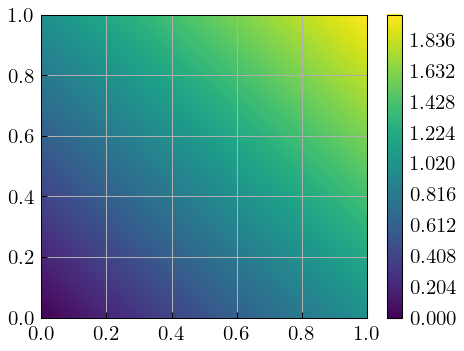

In [8]:
fig, ax = plt.subplots()
objective_plot = ax.contour(xs, ys, tf.reshape(linear_objective, [y_list.shape[0], x_list.shape[0]]), levels=500, zorder=1)
fig.colorbar(objective_plot)
ax.grid()
plt.show()

#### Goldstein-Price

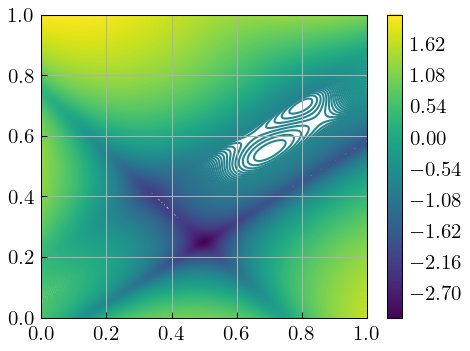

In [9]:
fig, ax = plt.subplots()
objective_plot = ax.contour(xs, ys, tf.reshape(goldstein_price_objective, [y_list.shape[0], x_list.shape[0]]), levels=500, zorder=1)
fig.colorbar(objective_plot)
plt.show()

## Constraints

#### Toy Constraint One

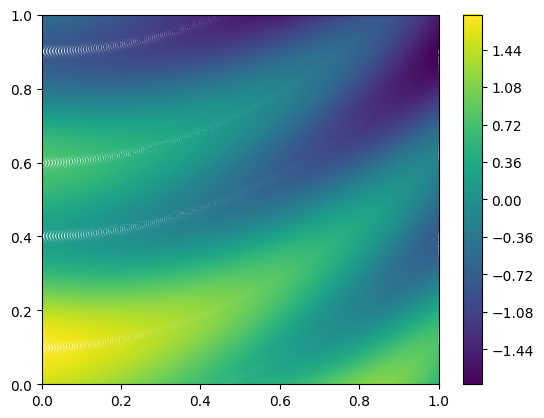

In [10]:
fig, ax = plt.subplots()
constraint_one_plot = ax.contour(xs, ys, tf.reshape(constraint_one, [y_list.shape[0], x_list.shape[0]]), levels=500, zorder=1)
fig.colorbar(constraint_one_plot)
plt.show()

#### Toy Constraint Two

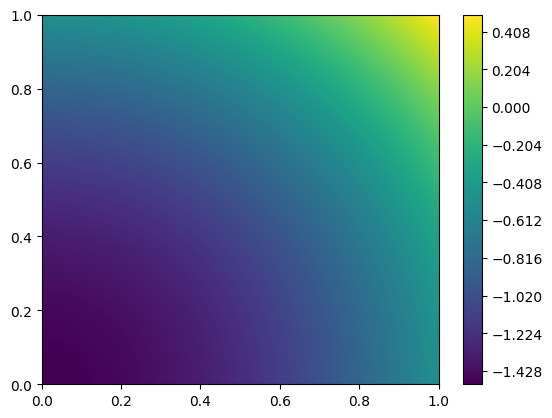

In [11]:
fig, ax = plt.subplots()
constraint_two_plot = ax.contourf(xs, ys, tf.reshape(constraint_two, [y_list.shape[0], x_list.shape[0]]), levels=500, zorder=1)
fig.colorbar(constraint_two_plot)
plt.show()

#### Centered Branin

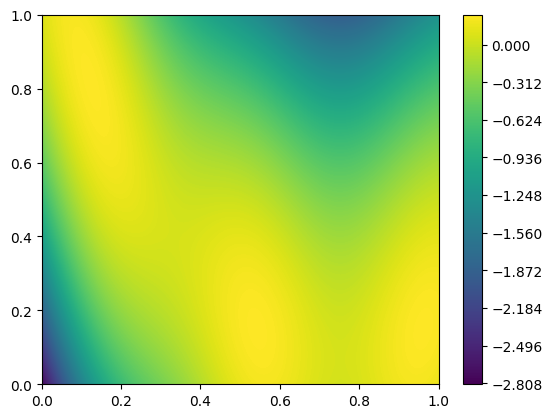

In [12]:
fig, ax = plt.subplots()
centered_branin_constraint = constraints.centered_branin(coordinates)
centered_branin_plot = ax.contourf(xs, ys, tf.reshape(centered_branin_constraint, [y_list.shape[0], x_list.shape[0]]), levels=500)
fig.colorbar(centered_branin_plot)
plt.show()

#### Parr

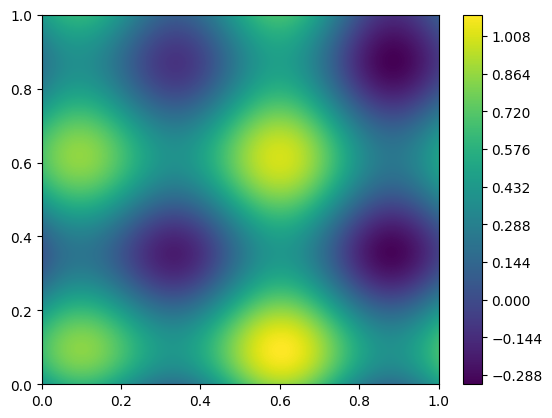

In [13]:
fig, ax = plt.subplots()
parr_plot = ax.contourf(xs, ys, tf.reshape(parr_constraint, [y_list.shape[0], x_list.shape[0]]), levels=500, zorder=1)
fig.colorbar(parr_plot)
plt.show()